In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import plotly
import plotly.graph_objects as go
import os

import os
BASE_PATH = '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion'
print(os.listdir(os.path.join(BASE_PATH, 'LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020')))

['Plot_results.m', 'Readme file - Description of Experimental Tests.txt', '10degC', '0degC', 'n10degC', 'n20degC', '25degC', '40degC', 'Technical Information and Experimental Test Results for LG 18650HG2.pdf']


In [2]:
MAIN_PATH = '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020'

A brand new 3Ah LG HG2 cell was tested in an 8 cu.ft. thermal chamber with a 75amp, 5 volt Digatron Firing Circuits Universal Battery Tester channel with a voltage and current accuracy of 0.1% of full scale. these data are used in the design process of an SOC estimator using a deep feedforward neural network (FNN) approach. The data also includes a description of data acquisition, data preparation, development of an FNN example script.

A new 3Ah LG HG2 cell was tested in an 8 cu.ft. thermal chamber with a 75amp, 5 volt Digatron Firing Circuits Universal Battery Tester channel with a voltage and current accuracy of 0.1% of full scale.

In [3]:
train1 = os.path.join(MAIN_PATH, '25degC')
l = os.listdir(train1)
l = [i for i in l if i.endswith('.csv')]
l

['549_Dis_2C.csv',
 '551_Charge5.csv',
 '551_Charge6.csv',
 '551_Charge2.csv',
 '551_Charge1.csv',
 '552_Charge12.csv',
 '549_HPPC.csv',
 '552_Charge9.csv',
 '551_LA92.csv',
 '552_Mixed6.csv',
 '552_Charge11.csv',
 '551_HWFET.csv',
 '552_Mixed8.csv',
 '551_Charge3.csv',
 '552_Charge15.csv',
 '551_Mixed1.csv',
 '551_Charge8.csv',
 '551_UDDS.csv',
 '551_Charge4.csv',
 '552_Cap_1C.csv',
 '552_Charge13.csv',
 '552_Mixed7.csv',
 '552_Charge16.csv',
 '552_Mixed4.csv',
 '549_Dis_0p5C.csv',
 '549_C20DisCh.csv',
 '551_Charge7.csv',
 '551_US06.csv',
 '551_Mixed2.csv',
 '549_Charge.csv',
 '552_Charge10.csv',
 '552_Mixed5.csv',
 '552_PausCycl.csv',
 '552_Mixed3.csv',
 '552_Charge14.csv',
 '551_Cap_1C.csv']

In [4]:
train1_csv = os.path.join(train1, '551_LA92.csv')
train1_csv

'/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/25degC/551_LA92.csv'

In [5]:
df_train1_csv = pd.read_csv(train1_csv, skiprows=30)
df_train1_csv.head()

,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.323,00:00:01.673,1,1.1,LG_HG2_CyclesA,4.19155,-0.05108,23.76583,-0.00000,-0.00000.1,5.00000,Unnamed: 14
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0,NaN
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0,NaN
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0,NaN
3,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.723,00:00:02.073,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00004,5.0,NaN
4,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.821,00:00:02.171,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00005,5.0,NaN


In [6]:
df_train1_csv.columns = ['Time Stamp','Step','Status','Prog Time','Step Time','Cycle',
                            'Cycle Level','Procedure','Voltage','Current','Temperature','Capacity','WhAccu','Cnt','Empty']

In [7]:
df_train1_csv = df_train1_csv.iloc[:, :-1] # run only once
df_train1_csv.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0


In [8]:
df_train1_csv.describe()

,Step,Cycle,Cycle Level,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
count,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.0
mean,39.119111,3.590197,0.940444,3.702031,-0.926346,24.246026,-1.336233,-4.964102,5.0
std,0.473326,2.064147,0.236663,0.282690,2.406846,0.222317,0.789170,2.811615,0.0
min,39.000000,0.000000,0.000000,2.859260,-12.144700,23.660670,-2.590260,-9.263270,5.0
25%,39.000000,2.000000,1.000000,3.499510,-2.331880,24.081300,-1.999075,-7.365255,5.0
50%,39.000000,4.000000,1.000000,3.716890,-0.155800,24.186460,-1.303810,-4.958720,5.0
75%,39.000000,5.000000,1.000000,3.946430,0.000000,24.396780,-0.663455,-2.591270,5.0
max,41.000000,7.000000,1.000000,4.208720,5.999610,25.027730,-0.000000,-0.000010,5.0


In [9]:
df_train1_csv = df_train1_csv[(df_train1_csv["Status"] == "TABLE") | (df_train1_csv["Status"] == "DCH")]
df_train1_csv.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0


In [10]:
max_discharge = abs(min(df_train1_csv["Capacity"])) # get maximum discharge
df_train1_csv["SoC Capacity"] = max_discharge + df_train1_csv["Capacity"]
df_train1_csv["SoC Percentage"] = df_train1_csv["SoC Capacity"] / max(df_train1_csv["SoC Capacity"])

In [11]:
df_train1_csv.shape

(94762, 16)

In [12]:
df_train1_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94762 entries, 0 to 94761
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time Stamp      94762 non-null  object 
 1   Step            94762 non-null  int64  
 2   Status          94762 non-null  object 
 3   Prog Time       94762 non-null  object 
 4   Step Time       94762 non-null  object 
 5   Cycle           94762 non-null  int64  
 6   Cycle Level     94762 non-null  int64  
 7   Procedure       94762 non-null  object 
 8   Voltage         94762 non-null  float64
 9   Current         94762 non-null  float64
 10  Temperature     94762 non-null  float64
 11  Capacity        94762 non-null  float64
 12  WhAccu          94762 non-null  float64
 13  Cnt             94762 non-null  float64
 14  SoC Capacity    94762 non-null  float64
 15  SoC Percentage  94762 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 12.3+ MB


## EDA

In [13]:
df_train1_csv['Prog Time']

0        16:50:37.423
1        16:50:37.522
2        16:50:37.622
3        16:50:37.723
4        16:50:37.821
             ...     
94757    19:28:40.577
94758    19:28:40.678
94759    19:28:40.778
94760    19:28:40.878
94761    19:28:40.897
Name: Prog Time, Length: 94762, dtype: object

In [14]:
# time_parts = input_string.split(':')
#         second_parts = time_parts[2].split('.')
#         return timedelta(hours=int(time_parts[0]), 
#             minutes=int(time_parts[1]), 
#             seconds=int(second_parts[0]), 
#             microseconds=int(second_parts[1])).total_seconds()
t1 = df_train1_csv['Prog Time'][0]
time_parts = t1.split(':')
second_part = time_parts[2].split('.')
timedelta(hours = int(time_parts[0]), minutes=int(time_parts[1]), 
          seconds = int(second_part[0]), 
          microseconds = int(second_part[1])).total_seconds()

60637.000423

In [15]:
df_train1_csv.isnull().sum()

Time Stamp        0
Step              0
Status            0
Prog Time         0
Step Time         0
Cycle             0
Cycle Level       0
Procedure         0
Voltage           0
Current           0
Temperature       0
Capacity          0
WhAccu            0
Cnt               0
SoC Capacity      0
SoC Percentage    0
dtype: int64

SOC vs Voltage

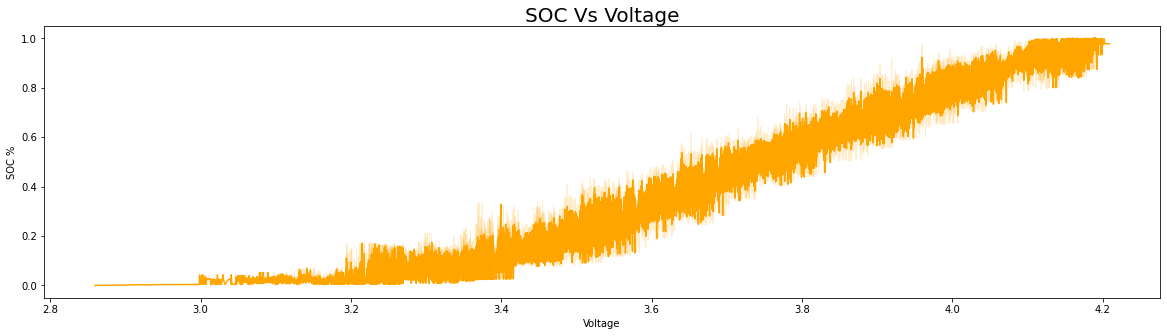

In [16]:
# df_train1_csv
x_val = df_train1_csv['Voltage'].to_numpy()
y_val = df_train1_csv['SoC Percentage'].to_numpy()
plt.figure(figsize=(20, 5))
sns.lineplot(y = y_val, x = x_val, data = df_train1_csv, color='orange')
plt.xlabel('Voltage')
plt.ylabel('SOC %')
plt.title('SOC Vs Voltage', 
          fontdict={'fontsize': 20,
        'fontweight': 3, 'verticalalignment': 'center',
        'horizontalalignment': 'center'})
plt.show()

SOC overtime

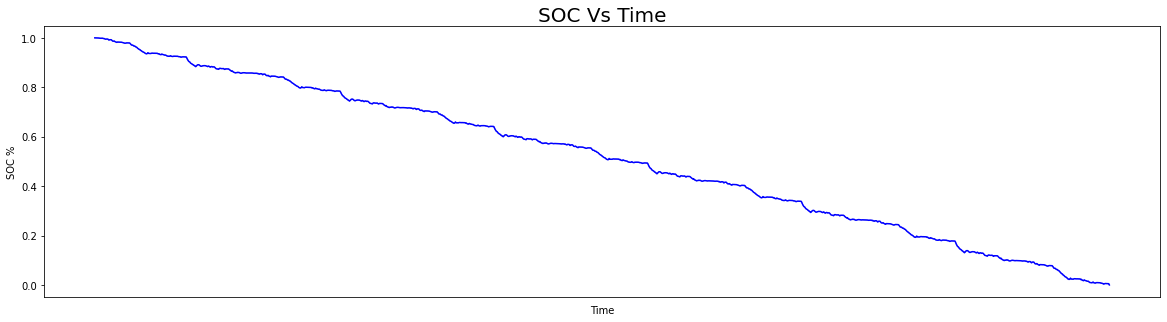

CPU times: user 3min 30s, sys: 682 ms, total: 3min 30s
Wall time: 3min 30s


In [59]:
%%time
x_val = df_train1_csv['Time Stamp'].to_numpy()
y_val = df_train1_csv['SoC Percentage'].to_numpy()

x_ticks_val = np.arange(0, 94762, 94762) # values to display on the x axis

plt.figure(figsize=(20, 5))
sns.lineplot(y = y_val, x = x_val, data = df_train1_csv, color='blue')
plt.xlabel('Time')
plt.ylabel('SOC %')
plt.title('SOC Vs Time', 
          fontdict={'fontsize': 20,
        'fontweight': 3, 'verticalalignment': 'center',
        'horizontalalignment': 'center'})
plt.xticks([])
plt.show()

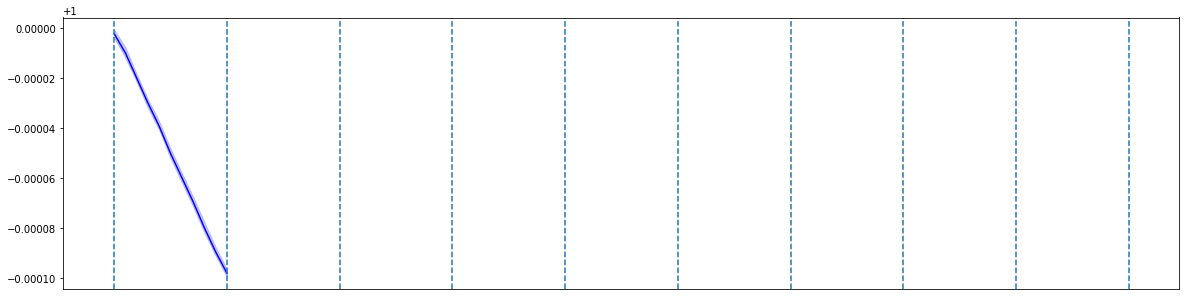

In [58]:
# plt.figure(figsize=(20, 5))
# a = np.arange(100)
# # 94762/ 7
# sns.lineplot(y = y_val[a], x = x_val[a], data = df_train1_csv.iloc[a], color='blue')
# plt.xticks([])

# for i in a[0::10]:
#     plt.axvline(i, ls='--')

# plt.show()

<Figure size 1440x360 with 0 Axes>

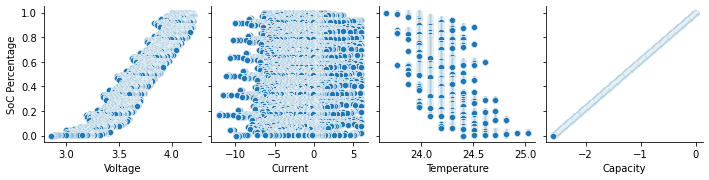

CPU times: user 1.6 s, sys: 280 ms, total: 1.88 s
Wall time: 1.48 s


In [17]:
%%time
plt.figure(figsize=(20, 5))
sns.pairplot(data=df_train1_csv, x_vars = ['Voltage','Current','Temperature', 'Capacity'], 
            y_vars = ['SoC Percentage'])
plt.show()

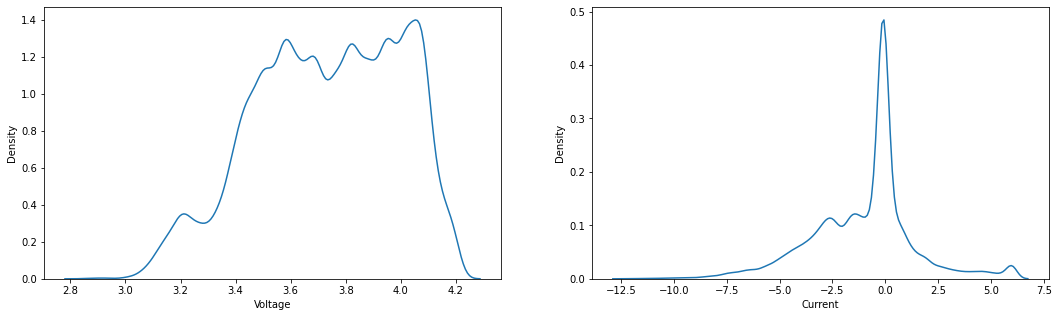

CPU times: user 1.58 s, sys: 594 ms, total: 2.17 s
Wall time: 1.2 s


In [18]:
%%time
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(data = df_train1_csv, x = 'Voltage', ax = axes[0])
sns.kdeplot(data = df_train1_csv, x = 'Current', ax = axes[1])
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

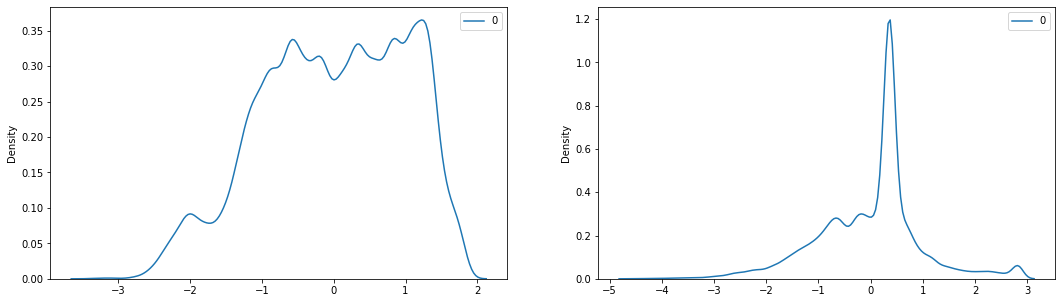

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

x = sc.fit_transform(df_train1_csv['Voltage'].to_numpy().reshape(-1, 1))
x1 = sc.fit_transform(df_train1_csv['Current'].to_numpy().reshape(-1, 1))
sns.kdeplot(data = x, ax = axes[0])
sns.kdeplot(data = x1, ax = axes[1])
plt.show()

Separate X and Y values

In [28]:
df_train1_csv[["Voltage", "Current", "Temperature"]].head()

,Voltage,Current,Temperature
0,4.19088,-0.08173,23.76583
1,4.19054,-0.08939,23.76583
2,4.19037,-0.09195,23.76583
3,4.19037,-0.09195,23.76583
4,4.19037,-0.09195,23.76583


In [42]:
x = df_train1_csv[["Voltage", "Current", "Temperature"]].to_numpy()
y = df_train1_csv[["SoC Percentage"]].to_numpy()

In [43]:
cycles = []
cycles.append((x, y))

In [2]:
# cycles[0] # x, y pair
# print(cycles[0][0])) # gives x
# print(cycles[0][1]) # gives Y
# print(cycles[0][0][0]) # gives voltage, current, temperature values

In [ ]:
# np.array(cycles[0][0:0 + steps])#.reshape(1, 300, x_tem_length)

In [32]:
steps = 300
x_length = len(cycles[0][0][0])
y_length = len(cycles[0][1][0])
x = np.empty((0, steps, x_length), float)
y = np.empty((0, steps, y_length), float)
# for cycle in cycles:
#     for i in range(0, len(cycle[0]) - steps, steps):
#         next_x = np.array(cycle[0][i:i + steps]).reshape(1, steps, x_length)
#         next_y = np.array(cycle[1][i:i + steps]).reshape(1, steps, y_length)
#         x = np.concatenate((x, next_x))
#         y = np.concatenate((y, next_y))

In [33]:
# next_x = np.array(cycle)
x_new = np.concatenate((x, np.array(cycles[0][0][0:300]).reshape(1, 300, x_length)))

In [36]:
x_new[:, 0:5]

array([[[ 4.19088, -0.08173, 23.76583],
        [ 4.19054, -0.08939, 23.76583],
        [ 4.19037, -0.09195, 23.76583],
        [ 4.19037, -0.09195, 23.76583],
        [ 4.19037, -0.09195, 23.76583]]])

# Step 1 Data Cleaning

**Function to gat data from the train and test data**<br>
First we will only focus in data that is recorded ranging from 0 to 25 degree celcius.

In [16]:
MAIN_PATH = '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/'

In [17]:
def get_discharge_whole_cycle(train_files, test_files, output_capacity = False, scale_test = False):
    '''
    This function returns the train and test data for all the cycle 
    according to the file paths provided
    and cales according to the user input.
    '''
    train = get_data(train_files, output_capacity)
    test = get_data(test_files, output_capacity)
    train, test = scale_x(train, test, scale_test = scale_test)
    return (train, test)

#--------------------------------------------------------------------------#

def get_data(names, output_capacity):
    '''
    Returns a tuple of (x, y) values for every file path
    '''
    cycles = [] # list to store tuple
    for name in names:
        print(f'Extracting for {name}...')
        cycle = pd.read_csv(MAIN_PATH + name + '.csv', skiprows=30)
        cycle.columns = ['Time Stamp','Step','Status','Prog Time','Step Time','Cycle',
                        'Cycle Level','Procedure','Voltage','Current','Temperature',
                        'Capacity','WhAccu','Cnt','Empty']
        
        cycle = cycle[(cycle["Status"] == "TABLE") | (cycle["Status"] == "DCH")]
        max_discharge = abs(min(cycle["Capacity"])) # get maximum capacity
        cycle["SoC Capacity"] = max_discharge + cycle["Capacity"] # soc capacity
        cycle["SoC Percentage"] = cycle["SoC Capacity"] / max(cycle["SoC Capacity"]) # compute soc for each timestep
        
        x = cycle[["Voltage", "Current", "Temperature"]].to_numpy()
        
        if output_capacity: # if we want output capacity
            y = cycle[['SoC Capacity']].to_numpy()
        else:
            y = cycle[["SoC Percentage"]].to_numpy()
            
        if np.isnan(np.min(x)) or np.isnan(np.min(y)): # if there is any nan value in the dataset
            print(f'Nan value at cycle :{name}, removing the nan...')
            x = [~np.isnan(x).any(axis = 1)]
            y = [~np.isnan(y).any(axis = 1)].reshape(-1, y.shape[1])
            
        cycles.append((x, y))
    return cycles
#---------------------------------------------------------------#

def scale_x(train, test, scale_test=False):
    '''
    Use min-max feature scaling to scale down the features on a uniform scale.
    '''
    for index in range(len(train[0][0][0])):
        f_min = min([min(cycle[0][0:, index]) for cycle in train])
        f_max = max([max(cycle[0][0:, index]) for cycle in train])
        
        for i in range(len(train)): # use min max scaling
            train[i][0][:index] = (train[i][0][:index] - f_min) / (f_max - f_min)
        
        if scale_test:
            for i in range(len(train)): # use min max scaling
                test_files[i][0][:, index] = (test[i][0][:index] - f_min) / (f_max - f_min)
    
    return train, test
#---------------------------------------------------------------#

**Function to split the dataset into train and test**

In [18]:
def get_discharge_multiple_step(cycles, steps=300):
    train_x, train_y = _split_to_multiple_step(cycles[0], steps)
    test_x, test_y = _split_to_multiple_step(cycles[1], steps)
    return (train_x, train_y, test_x, test_y)


def _split_to_multiple_step(cycles, steps):
    x_length = len(cycles[0][0][0])
    y_length = len(cycles[0][1][0])
    x = np.empty((0, steps, x_length), float)
    y = np.empty((0, steps, y_length), float)
    for cycle in cycles:
        for i in range(0, len(cycle[0]) - steps, steps):
            next_x = np.array(cycle[0][i:i + steps]).reshape(1, steps, x_length)
            next_y = np.array(cycle[1][i:i + steps]).reshape(1, steps, y_length)
            x = np.concatenate((x, next_x))
            y = np.concatenate((y, next_y))
        return x, y
    

def keep_only_y_end(y, step, is_stateful=False):
    if is_stateful:
        return y[:,:,::step]
    else:
        return y[:,::step]

In [19]:
# def plot_distribution(file_names):
#     '''
#     Plot the distribution of the dataset
#     '''
#     for 

**Set up training data, test data and other parameters**

In [20]:
train_files = [
    '0degC/589_Mixed1',
    '0degC/589_Mixed2',
    '0degC/590_Mixed4',
    '0degC/590_Mixed5',
    '0degC/590_Mixed6',
    '0degC/590_Mixed8',

    '10degC/567_Mixed1',
    '10degC/567_Mixed2',
    '10degC/571_Mixed4',
    '10degC/571_Mixed5',
    '10degC/571_Mixed6',
    '10degC/571_Mixed8',
    
    '25degC/551_Mixed1', 
    '25degC/551_Mixed2', 
    #'25degC/552_Mixed3',
    '25degC/552_Mixed4', 
    '25degC/552_Mixed5', 
    '25degC/552_Mixed6', 
    '25degC/552_Mixed8',   
    ]
test_files = [
    '0degC/589_LA92',
    '0degC/589_UDDS',
    '0degC/589_US06',
    '0degC/590_Mixed7',
    '10degC/576_UDDS',
    '10degC/567_US06',
    '10degC/571_Mixed7',

    '25degC/551_LA92', 
    '25degC/551_UDDS', 
    '25degC/551_US06',
    '25degC/552_Mixed7', 
    ]

steps = 300

In [21]:
%%time
# name = '25degC/551_LA92'
# cycle = pd.read_csv(MAIN_PATH + name + '.csv', skiprows=30)
cycles = get_discharge_whole_cycle(train_files, test_files)

Extracting for 0degC/589_Mixed1...
Extracting for 0degC/589_Mixed2...
Extracting for 0degC/590_Mixed4...
Extracting for 0degC/590_Mixed5...
Extracting for 0degC/590_Mixed6...
Extracting for 0degC/590_Mixed8...
Extracting for 10degC/567_Mixed1...
Extracting for 10degC/567_Mixed2...
Extracting for 10degC/571_Mixed4...
Extracting for 10degC/571_Mixed5...
Extracting for 10degC/571_Mixed6...
Extracting for 10degC/571_Mixed8...
Extracting for 25degC/551_Mixed1...
Extracting for 25degC/551_Mixed2...
Extracting for 25degC/552_Mixed4...
Extracting for 25degC/552_Mixed5...
Extracting for 25degC/552_Mixed6...
Extracting for 25degC/552_Mixed8...
Extracting for 0degC/589_LA92...
Extracting for 0degC/589_UDDS...
Extracting for 0degC/589_US06...
Extracting for 0degC/590_Mixed7...
Extracting for 10degC/576_UDDS...
Extracting for 10degC/567_US06...
Extracting for 10degC/571_Mixed7...
Extracting for 25degC/551_LA92...
Extracting for 25degC/551_UDDS...
Extracting for 25degC/551_US06...
Extracting for 25d

In [22]:
print(f'First element of cycles has {len(cycles[0])} files and they belong to training data.\nSecond element of cycles has {len(cycles[1])} files and they belong to test data.')

print("Train/Test %d" % len(cycles))
print("Train cycles: %d" % len(cycles[0]))
print("x/y :%d" % len(cycles[0][0]))
print("time_steps: %d" % len(cycles[0][0][0]))
print("x features: %d" % len(cycles[0][0][0][0]))

First element of cycles has 18 files and they belong to training data.
Second element of cycles has 11 files and they belong to test data.
Train/Test 2
Train cycles: 18
x/y :2
time_steps: 61310
x features: 3


Split the data into train and test

In [23]:
train_x, train_y, test_x, test_y = get_discharge_multiple_step(cycles, 300)

Check the dimentions

In [24]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((204, 300, 3), (204, 300, 1), (251, 300, 3), (251, 300, 1))

In [25]:
train_y = keep_only_y_end(train_y, steps)
test_y = keep_only_y_end(test_y, steps)

display_x = train_x.reshape(train_x.shape[0]*train_x.shape[1], train_x.shape[2])
display_y = train_y.reshape(train_y.shape[0]*train_y.shape[1], train_y.shape[2])

Display the X values

In [12]:
from plotly.subplots import make_subplots

fig = go.Figure()

fig = plotly.subplots.make_subplots(rows=3, cols=1, shared_xaxes=True)

fig.add_trace(go.Scatter(y=display_x[:,0], mode='lines', name='Voltage'), row=1, col=1)
fig.update_yaxes(title_text="Voltage", row=1, col=1)

fig.add_trace(go.Scatter(y=display_x[:,1], mode='lines', name='Current'), row=2, col = 1)
fig.update_yaxes(title_text="Current", row=2, col=1)

fig.add_trace(go.Scatter(y=display_x[:,2],mode='lines', name='Temperature'), row = 3, col = 1)
fig.update_yaxes(title_text="Temperature", row=3, col=1)

fig.show()

Display the y values

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=display_y[:,0],
                        mode='lines', name='SoC'))
fig.update_layout(title='Y Data',
                    xaxis_title='Step',
                    yaxis_title='SoC',
                    width=1000,
                    height=500)
fig.show()

## Training the Model

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.layers import LSTM, Embedding, RepeatVector, TimeDistributed, Masking
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback

In [27]:
EXPERIMENT = "lstm_soc_percentage_lg_positive_temp_300_steps_mixed_cycle_test"

experiment_name = time.strftime("%Y-%m-%d-%H-%M-%S") + '_' + EXPERIMENT
print(f'We are performing : {experiment_name}')

opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)

model = Sequential()

model.add(LSTM(units = 256, activation = 'selu',
              return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(LSTM(units = 256, activation = 'selu', return_sequences=False))
model.add(Dense(256, activation='selu'))
model.add(Dense(128, activation='selu'))
model.add(Dense(1, activation='linear'))

model.summary()

We are performing : 2023-02-21-04-14-14_lstm_soc_percentage_lg_positive_temp_300_steps_mixed_cycle_test
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 300, 256)          266240    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 890,369
Trainable params: 890,369
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=opt, loss='huber', metrics=['accuracy', 'mse', 'mae', 'mape', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

es = EarlyStopping(monitor='val_loss', patience=50)
mc = ModelCheckpoint('/kaggle/working/' + 'results/trained_model/%s_best.h5' % experiment_name, 
                             save_best_only=True, 
                             monitor='val_loss')

In [31]:
%%time
history = model.fit(train_x, train_y, 
                                epochs=200, 
                                batch_size=32, 
                                verbose=1,
                                validation_split=0.2,
                                callbacks = [es, mc]
                               )

Epoch 1/200
6/6 [==============================] - 8s 1s/step - loss: 0.0191 - accuracy: 0.0061 - mse: 0.0382 - mae: 0.1707 - mape: 33.2529 - rmse: 0.1954 - val_loss: 0.1027 - val_accuracy: 0.0000e+00 - val_mse: 0.2055 - val_mae: 0.4131 - val_mape: 400.5592 - val_rmse: 0.4533
Epoch 2/200
6/6 [==============================] - 8s 1s/step - loss: 0.0191 - accuracy: 0.0061 - mse: 0.0382 - mae: 0.1722 - mape: 32.4538 - rmse: 0.1955 - val_loss: 0.0980 - val_accuracy: 0.0000e+00 - val_mse: 0.1961 - val_mae: 0.4016 - val_mape: 391.3944 - val_rmse: 0.4429
Epoch 3/200
6/6 [==============================] - 7s 1s/step - loss: 0.0189 - accuracy: 0.0061 - mse: 0.0378 - mae: 0.1710 - mape: 32.2978 - rmse: 0.1943 - val_loss: 0.1017 - val_accuracy: 0.0000e+00 - val_mse: 0.2036 - val_mae: 0.4120 - val_mape: 398.3996 - val_rmse: 0.4512
Epoch 4/200
6/6 [==============================] - 7s 1s/step - loss: 0.0185 - accuracy: 0.0061 - mse: 0.0371 - mae: 0.1686 - mape: 32.6554 - rmse: 0.1926 - val_loss: 0.

In [33]:
model.save('/kaggle/working/'+ 'results/trained_model/%s.h5' % experiment_name)

history_df = pd.DataFrame(history.history)
history_csv_file = '/kaggle/working/' + 'results/trained_model/%s_history.csv' % experiment_name
with open(history_csv_file, mode='w') as f:
    history_df.to_csv(f)

## Test the model

In [35]:
model.evaluate(test_x, test_y)

8/8 [==============================] - 1s 99ms/step - loss: 0.0125 - accuracy: 0.0040 - mse: 0.0251 - mae: 0.1182 - mape: 66.8254 - rmse: 0.1584


[0.012548125348985195,
 0.0039840638637542725,
 0.02509625069797039,
 0.11820099502801895,
 66.82536315917969,
 0.1584179550409317]

## Visualize the result

In [36]:
result_df = pd.read_csv('/kaggle/working/results/trained_model/2023-02-21-04-14-14_lstm_soc_percentage_lg_positive_temp_300_steps_mixed_cycle_test_history.csv')
result_df.head()

,Unnamed: 0,loss,accuracy,mse,mae,mape,rmse,val_loss,val_accuracy,val_mse,val_mae,val_mape,val_rmse
0,0,0.019083,0.006135,0.038165,0.170690,33.252899,0.195359,0.102671,0.0,0.205525,0.413144,400.559174,0.453348
1,1,0.019113,0.006135,0.038226,0.172234,32.453850,0.195515,0.097999,0.0,0.196129,0.401603,391.394379,0.442864
2,2,0.018877,0.006135,0.037754,0.170993,32.297787,0.194303,0.101715,0.0,0.203580,0.411962,398.399567,0.451199
3,3,0.018540,0.006135,0.037081,0.168649,32.655369,0.192564,0.103720,0.0,0.207608,0.417323,402.220093,0.455641
4,4,0.018319,0.006135,0.036638,0.167297,32.604034,0.191411,0.102853,0.0,0.205883,0.414713,400.878754,0.453743


### Plotting trainining and Validation loss

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(y = history.history['loss'], mode='lines', name = 'train'))

fig.add_trace(go.Scatter(y = history.history['val_loss'], mode='lines', name = 'validation'))

fig.update_layout(title='Loss trend',
                  xaxis_title='epoch',
                  yaxis_title='loss')
fig.show()

### Predictions on training

In [38]:
train_predictions = model.predict(train_x)

In [39]:
cycle_num = 0
steps_num = 8000
step_index = np.arange(cycle_num*steps_num, (cycle_num+1)*steps_num)

fig = go.Figure()
fig.add_trace(go.Scatter(x=step_index, y=train_predictions.flatten()[cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='SoC predicted'))
fig.add_trace(go.Scatter(x=step_index, y=train_y.flatten()[cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='SoC actual'))
fig.update_layout(title='Results on training',
                  xaxis_title='Step',
                  yaxis_title='SoC percentage')
fig.show()



### Predictions on testing

In [40]:
test_predictions = model.predict(test_x)

In [41]:
cycle_num = 0
steps_num = 8000
step_index = np.arange(cycle_num*steps_num, (cycle_num+1)*steps_num)

fig = go.Figure()
fig.add_trace(go.Scatter(x=step_index, y=test_predictions.flatten()[cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='SoC predicted'))
fig.add_trace(go.Scatter(x=step_index, y=test_y.flatten()[cycle_num*steps_num:(cycle_num+1)*steps_num],
                    mode='lines', name='SoC actual'))
fig.update_layout(title='Results on testing',
                  xaxis_title='Step',
                  yaxis_title='SoC percentage')
fig.show()

